In [1]:
import ast  
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

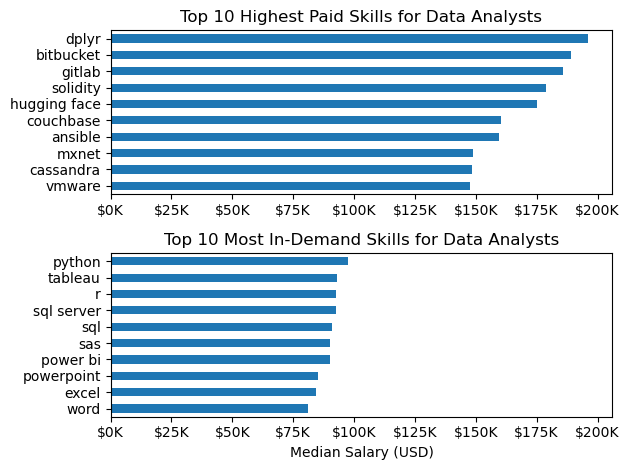

In [2]:
# copying the data from 19_Exercise_Skill_Pay_Analysis

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US = df_DA_US.dropna(subset= 'salary_year_avg')

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by= 'median', ascending= False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending = False).head(10).sort_values(by= 'median', ascending= False).head(10)

fig, ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind= 'barh', y= 'median', ax=ax[0], legend= False) # important: y='median'
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
# ax= plt.gca() not required as ax is mentioned in the parameter of df.plot()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind= 'barh', y= 'median', ax= ax[1], legend= False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

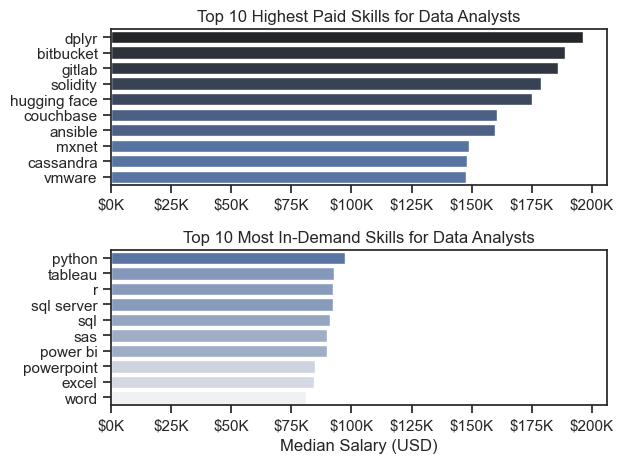

In [17]:
# copying the data from 19_Exercise_Skill_Pay_Analysis

import seaborn as sns

sns.set_theme(style= 'ticks')

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US = df_DA_US.dropna(subset= 'salary_year_avg')

df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_top_pay = df_DA_US_group.sort_values(by= 'median', ascending= False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending = False).head(10).sort_values(by= 'median', ascending= False).head(10)

fig, ax = plt.subplots(2,1)

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data= df_DA_top_pay, x='median', y= df_DA_top_pay.index, ax= ax[0], hue= 'median', palette= 'dark:b_r')
ax[0].legend().remove()

# df_DA_top_pay[::-1].plot(kind= 'barh', y= 'median', ax=ax[0], legend= False) # important: y='median'
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
# ax= plt.gca() not required as ax is mentioned in the parameter of df.plot()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data= df_DA_skills, x='median', y= df_DA_skills.index, ax= ax[1], hue= 'median', palette= 'light:b', legend= False)

# df_DA_skills[::-1].plot(kind= 'barh', y= 'median', ax= ax[1], legend= False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()

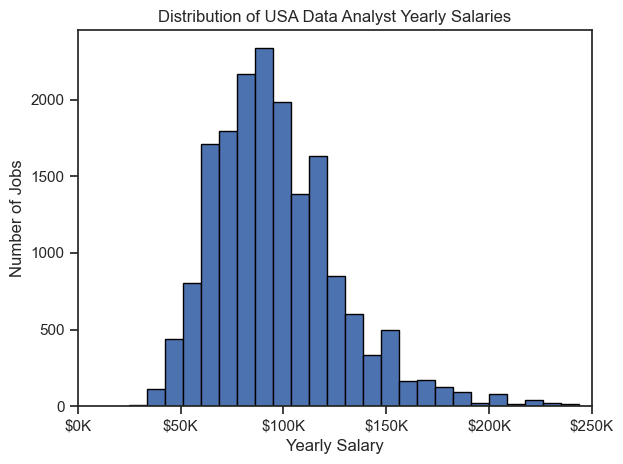

In [20]:
# now let's do the modification for histograms
# we can use histplot but displot has (kde) smooth curve distribution

df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')

# sns.displot(df_DA_US['salary_year_avg'].displot(kind= 'kde', fill= True))

plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of USA Data Analyst Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')
plt.tight_layout()
plt.show()

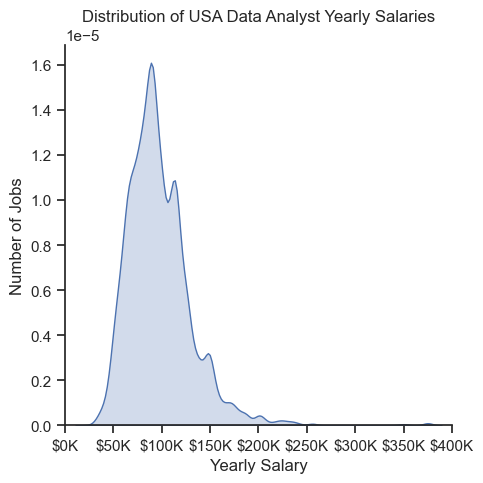

In [23]:
# now let's do the modification for histograms
# we can use histplot but displot has (kde) smooth curve distribution

# df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')

sns.displot(df_DA_US['salary_year_avg'], kind= 'kde', fill= True)
plt.xlim(0,400000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.title('Distribution of USA Data Analyst Yearly Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')
plt.tight_layout()
plt.show()

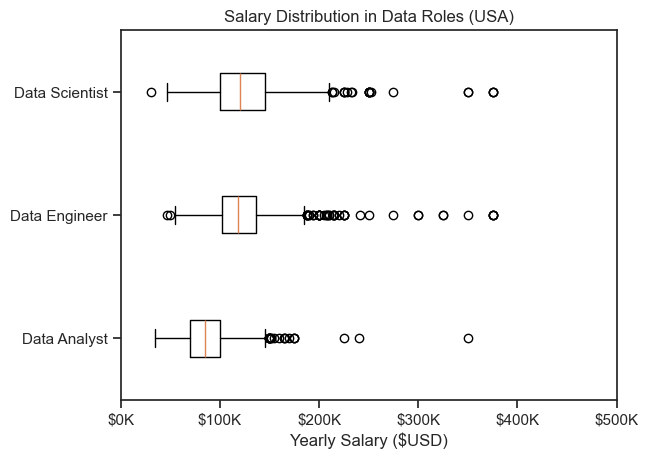

In [26]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels= job_titles, vert= False)

plt.title('Salary Distribution in Data Roles (USA)')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 500000)
plt.show()

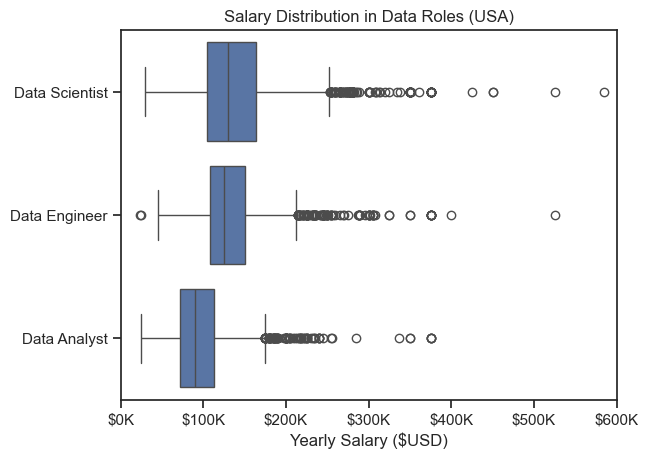

In [35]:
role_order = ['Data Scientist', 'Data Engineer', 'Data Analyst']
df_US['job_title_short'] = pd.Categorical(df_US['job_title_short'], categories = role_order, ordered= True)
# the above code is just a workaound simply to change the order of y-axis labels for the boxplot

sns.boxplot(data= df_US, x= 'salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in Data Roles (USA)')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()